## Analyse exploratoire des accidents de la circulation Équaterienne de janvier au septembre 

In [110]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
#Importamos los datos a utilizar

transito2=pd.read_excel("C:\\Users\\lenovo\\Desktop\\SAMUEL DIAZ\\DATOS NO ESTRUCTURADOS\\09.-REPORTES-NACIONALES-SEPTIEMBRE-2021.xlsx",
                       sheet_name="base_datos", parse_dates=[["FECHA","HORA"]])

In [25]:
transito2.set_index('FECHA_HORA', inplace=True)

In [26]:
transito2.head()

,MES,AÑO,SINIESTROS,ENTE DE CONTROL,PROVINCIA,ZONA PLANIFICACIÓN,DÍA,PERÍODO,FERIADO,CÓDIGO CAUSA,...,SUMA DE VEHÍCULOS,LESIONADOS,FALLECIDOS,TIPO DE IDENTIFICACIÓN 1,EDAD 1,SEXO 1,CONDICIÓN 1,PARTICIPANTE 1,USO DE CASCO 1,USO DE CINTURÓN DE SEGURIDAD 1
FECHA_HORA,,,,,,,,,,,,,,,,,,,,,
2021-01-01 00:00:00,ENERO,2021,PNE40846012021,PNE,TUNGURAHUA,ZONA 3,viernes,0,SI,C06,...,2,0,0,CÉDULA,37,HOMBRE,ILESO,CONDUCTOR,NO,SI
2021-01-01 00:03:00,ENERO,2021,MRI20017012021,MRI,CHIMBORAZO,ZONA 3,viernes,0,SI,C12,...,2,1,0,CÉDULA,25,HOMBRE,LESIONADO,CONDUCTOR,NO,NO
2021-01-01 00:18:00,ENERO,2021,ATM0001012021,ATM,GUAYAS,ZONA 8,viernes,0,SI,C09,...,1,2,0,PASAPORTE,29,HOMBRE,LESIONADO,CONDUCTOR,SI,NO
2021-01-01 00:47:00,ENERO,2021,CTE187578012021,CTE,LOS RÍOS,ZONA 5,viernes,0,SI,C12,...,2,1,0,CÉDULA,-1,HOMBRE,LESIONADO,CONDUCTOR,NO,NO
2021-01-01 01:15:00,ENERO,2021,CTE187573012021,CTE,GUAYAS,ZONA 5,viernes,1,SI,C18,...,2,2,0,NO IDENTIFICADO,-1,HOMBRE,LESIONADO,PASAJERO,NO,NO


On va corriger les noms des colonnes

In [27]:
transito2.rename(columns=str.lower, inplace=True)

In [28]:
transito2.columns

Index(['mes', 'año', 'siniestros', 'ente de control', 'provincia',
       'zona planificación', 'día', 'período', 'feriado', 'código causa',
       'causa probable', 'clase final', 'zona', 'latitud (y)', 'longitud (x)',
       'nombre de la vía', 'tipo de vía', 'dirección', 'cantón', 'parroquia',
       'tipo de vehículo 1', 'servicio 1', 'automóvil', 'bicicleta', 'bus',
       'camión', 'camioneta', 'emergencias', 'especial', 'furgoneta',
       'motocicleta', 'no identificado', 'vehículo deportivo utilitario',
       'suma de vehículos', 'lesionados', 'fallecidos',
       'tipo de identificación 1', 'edad 1', 'sexo 1', 'condición 1',
       'participante 1', 'uso de casco 1', 'uso de cinturón de seguridad 1'],
      dtype='object')

In [29]:
## on va remplacer les espaces par "_"
elim_es=lambda x: x[:45].replace(" ","_")
transito2.columns=transito2.columns.map(elim_es)

In [30]:
transito2.columns

Index(['mes', 'año', 'siniestros', 'ente_de_control', 'provincia',
       'zona_planificación', 'día', 'período', 'feriado', 'código_causa',
       'causa_probable', 'clase_final', 'zona', 'latitud_(y)', 'longitud_(x)',
       'nombre_de_la_vía', 'tipo_de_vía', 'dirección', 'cantón', 'parroquia',
       'tipo_de_vehículo_1', 'servicio_1', 'automóvil', 'bicicleta', 'bus',
       'camión', 'camioneta', 'emergencias', 'especial', 'furgoneta',
       'motocicleta', 'no_identificado', 'vehículo_deportivo_utilitario',
       'suma_de_vehículos', 'lesionados', 'fallecidos',
       'tipo_de_identificación_1', 'edad_1', 'sexo_1', 'condición_1',
       'participante_1', 'uso_de_casco_1', 'uso_de_cinturón_de_seguridad_1'],
      dtype='object')

In [31]:
def columna(txt):
  transTable = txt.maketrans("áéíóú", "aeiou")
  txt = txt.translate(transTable)
  return(txt)
transito2.columns=transito2.columns.map(columna)

In [32]:
transito2.columns

Index(['mes', 'año', 'siniestros', 'ente_de_control', 'provincia',
       'zona_planificacion', 'dia', 'periodo', 'feriado', 'codigo_causa',
       'causa_probable', 'clase_final', 'zona', 'latitud_(y)', 'longitud_(x)',
       'nombre_de_la_via', 'tipo_de_via', 'direccion', 'canton', 'parroquia',
       'tipo_de_vehiculo_1', 'servicio_1', 'automovil', 'bicicleta', 'bus',
       'camion', 'camioneta', 'emergencias', 'especial', 'furgoneta',
       'motocicleta', 'no_identificado', 'vehiculo_deportivo_utilitario',
       'suma_de_vehiculos', 'lesionados', 'fallecidos',
       'tipo_de_identificacion_1', 'edad_1', 'sexo_1', 'condicion_1',
       'participante_1', 'uso_de_casco_1', 'uso_de_cinturon_de_seguridad_1'],
      dtype='object')

In [33]:
#premier graphique

mes_accidente=transito2.loc["2021"].resample("M").agg("count")['mes']

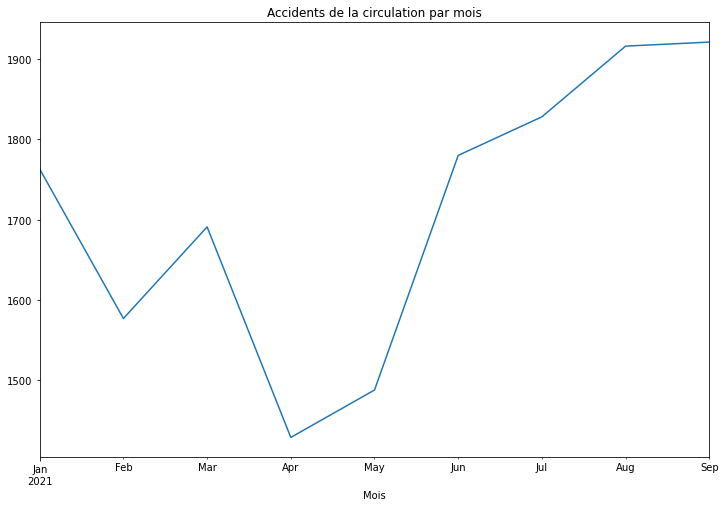

In [34]:
mes_accidente.plot(figsize=(12,8))
plt.title('Accidents de la circulation par mois')
plt.xlabel('Mois')
plt.show()

Le diagramme ci-dessus illustre l'évolution du nombre des accidents de la circulation en 2021, jusqu'au mois de septembre. Il faut souligner que le nombre des accidents a augmenté depuis le milieu de l'année.

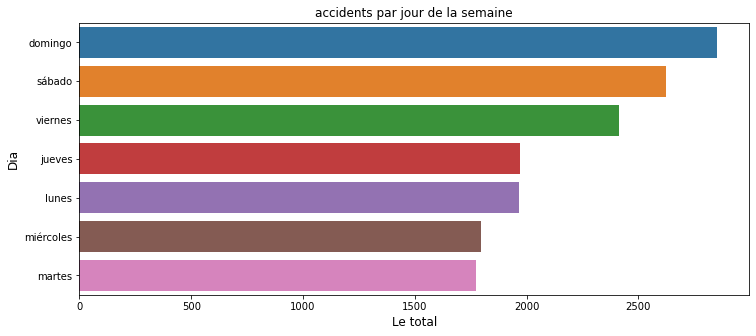

In [58]:
dias=transito2['dia'].value_counts()
dias=pd.DataFrame(data=dias)
dias.reset_index(inplace=True)
plt.figure(figsize=(12,5))
sns.barplot(x='dia', y='index', data=dias, orient='h')
plt.title('accidents par jour de la semaine', fontsize='large')
plt.xlabel("Le total", fontsize='large')
plt.ylabel("Dia", fontsize='large')
plt.show()

Le diagramme ci-dessus révèle que les accidents de la circulation augmentent à l'approche du week-end, ce qui est attendu puisque les citoyens se déplacent le week-end et que le risque d'accident est plus élevé, vu le nombre de personnes qui conduisent un véhicule quelconque.

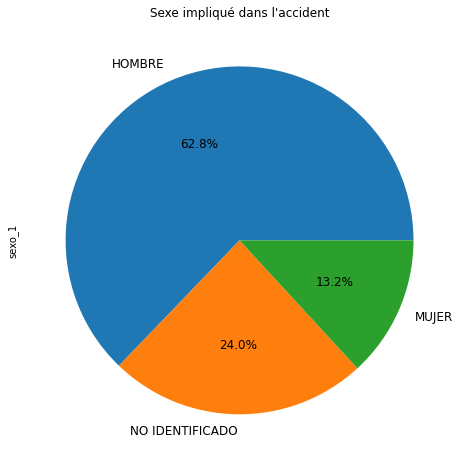

In [55]:
transito2['sexo_1'].value_counts().plot.pie(autopct='%.1f%%',fontsize='large', figsize=(12,8))
plt.title("Sexe impliqué dans l'accident")
plt.show()


Le diagramme circulaire illustre, en pourcentage, la proportion des hommes et des femmes victimes des accidents de la route. Toutefois, il faut noter que dans certains cas, le genre n'est pas identifié.

In [39]:
sex_condi=pd.crosstab(index=transito2['sexo_1'],
                     columns=transito2['condicion_1'], margins=True)

In [40]:
sex_condi

condicion_1,FALLECIDO,ILESO,LESIONADO,NO IDENTIFICADO,All
sexo_1,,,,,
HOMBRE,927,3281,5150,310,9668
MUJER,144,506,1341,34,2025
NO IDENTIFICADO,242,348,1824,1286,3700
All,1313,4135,8315,1630,15393


Le tableau de contingence permet de connaître plus précisément les caractéristiques des personnes concernées en fonction de leur genre. Comme nous le constatons, dans chacune des conditions de statuts de la victime, les hommes prédominent.

In [45]:
sexo_cond=transito2.groupby(['sexo_1','condicion_1']).count()['mes']

In [46]:
sexo_cond=pd.DataFrame(data=sexo_cond)

In [47]:
sexo_cond.reset_index(inplace=True)

In [49]:
sexo_cond.head()

,sexo_1,condicion_1,mes
0,HOMBRE,FALLECIDO,927
1,HOMBRE,ILESO,3281
2,HOMBRE,LESIONADO,5150
3,HOMBRE,NO IDENTIFICADO,310
4,MUJER,FALLECIDO,144


In [50]:

sex2=sexo_cond.pivot(index='condicion_1',
                    columns='sexo_1',
                    values='mes')

In [51]:
sex2.head()

sexo_1,HOMBRE,MUJER,NO IDENTIFICADO
condicion_1,,,
FALLECIDO,927,144,242
ILESO,3281,506,348
LESIONADO,5150,1341,1824
NO IDENTIFICADO,310,34,1286


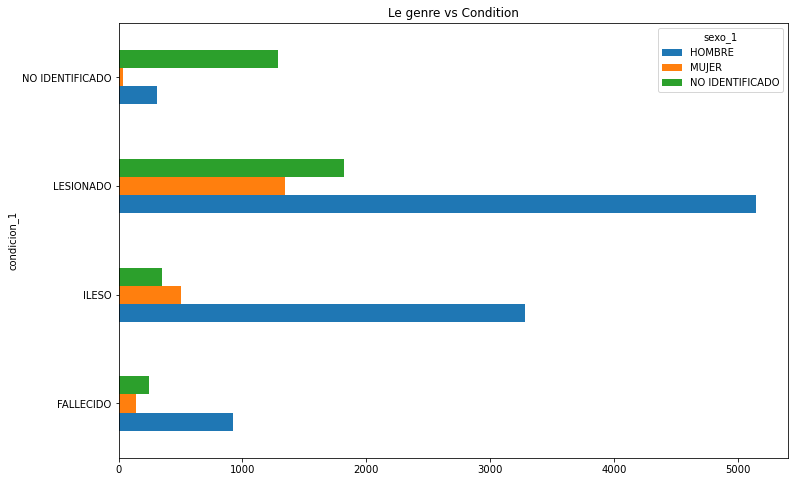

In [111]:
sex2.plot.barh(figsize=(12,8))
plt.title('Le genre vs Condition', fontsize='large')

plt.show()


Le diagramme illustre plus clairement ce que le tableau de contingence précédent indique.

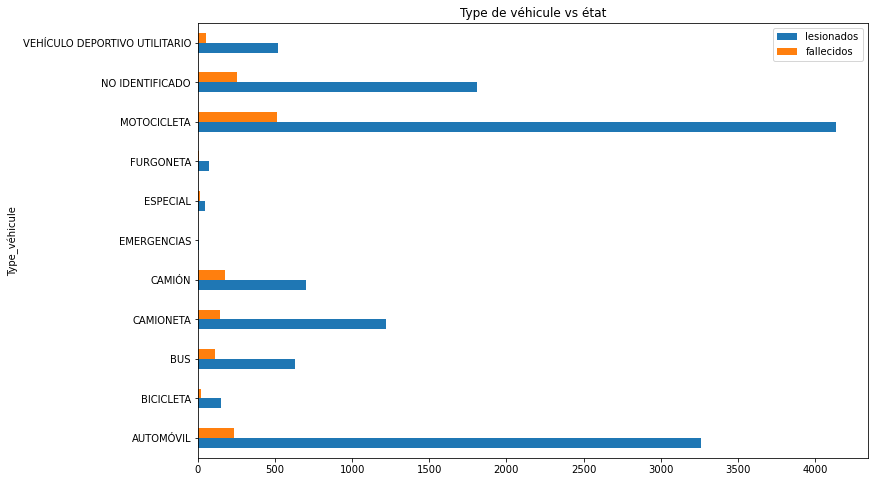

In [63]:
transito2.groupby('tipo_de_vehiculo_1')[['lesionados','fallecidos']].sum().plot.barh(figsize=(12,8))
plt.title('Type de véhicule vs état', fontsize='large')
plt.ylabel('Type_véhicule')
plt.show()

Ce graphique à barres affiche les nombres des blessés et des tués par type de véhicules utilisés lors des accidents de la route. Les motos sont les véhicules qui font le plus grand nombres des blessés et des tués.

In [64]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
causas_listas=transito2.causa_probable.tolist()
unique_string=(" ").join(causas_listas)

Afin de connaître les causes probables des accidents de la route, nous utiliserons la méthode appelée wordclaud, qui fait ressortir les mots les plus fréquents. Dans ce cas, plus un mot est répété, plus il joue en faveur de la cause probable de l'accident de la route.

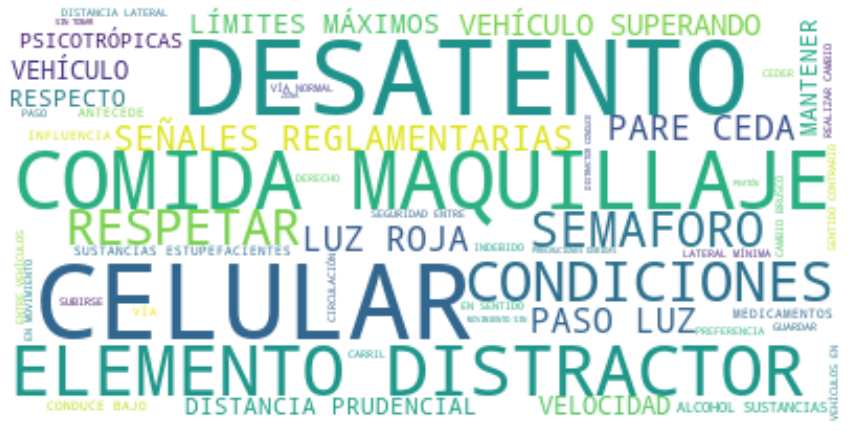

In [71]:
exclure_mots=["DE","LA","LAS",'TRÁNSITO',"EL","OTRO","CONDUCIR","A","O","CUALQUIER","VIDEO","ETC","NO","PANTALLAS",
             "AL","CON","LOS","QUE", "LE","DEL","Y"]
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white",stopwords=exclure_mots).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Le wordcloud permet de constater un nombre disproportionné d'accidents dont la personne concernée ne fait pas attention à la route, utilise son téléphone portable, se distrait d'une manière ou d'une autre et ne respecte pas les feux rouges ou la signalisation.
Par contre, la consomption des substances psychotropes et des stupéfiants, qui sont considérées comme une possible cause des accidents, est moins fréquente mais se remarque.


In [72]:
cla_final=transito2['clase_final'].value_counts()
cla_final=pd.DataFrame(data=cla_final)
cla_final.reset_index(inplace=True)


In [73]:
cla_final

,index,clase_final
0,CHOQUE LATERAL,4577
1,ESTRELLAMIENTOS,1941
2,ATROPELLOS,1749
3,PÉRDIDA DE PISTA,1637
4,CHOQUE POSTERIOR,1615
5,CHOQUE FRONTAL,900
6,ROZAMIENTOS,713
7,PÉRDIDA DE CARRIL,707
8,CAÍDA DE PASAJERO,413
9,COLISIÓN,392


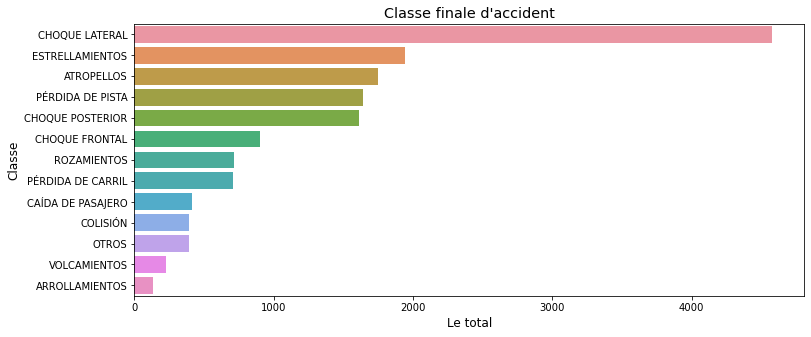

In [75]:
plt.figure(figsize=(12,5))
sns.barplot(x='clase_final', y='index', data=cla_final, orient='h')
plt.title("Classe finale d'accident", fontsize= "x-large")
plt.xlabel("Le total", fontsize='large')
plt.ylabel("Classe", fontsize='large')
plt.show()


Finalement, nous concluons avec les différents types des accidents rencontrés, la majorité sont des accidents latéraux, suivis par des collisions.